### Some Theory

##### Types of data used for I/O:
- Text - '12345' as a sequence of unicode chars
- Binary - 12345 as a sequence of bytes of its binary equivalent

##### Hence there are 2 file types to deal with
- Text files - All program files are text files
- Binary Files - Images,music,video,exe files

### How File I/O is done in most programming languages

- Open a file
- Read/Write data
- Close the file

### Writing to a file

In [39]:
# case 1 - if the file is not present
f = open('sample.txt','w')
f.write('Hello world')
f.close()

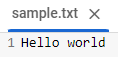

We can specify a path where we want to create our sample.txt file. In above code sample.txt file will be created in the current directory in which this coding file is present.

In [40]:
# case 1 - if the file is not present
f = open('sample.txt','w')
f.write('Hello world')
f.close()
# since file is closed hence this will not work
f.write('hello')

ValueError: I/O operation on closed file.

In [41]:
# write multiline strings
f = open('sample1.txt','w')
f.write('hello world')
f.write('\nhow are you?')
f.close()

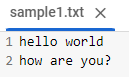

In [42]:
# case 2 - if the file is already present
f = open('sample.txt','w')
f.write('salman khan') # now the previous content will get replaced with new content.
f.close()

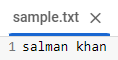

### how exactly open() works?

All files exists in harddrive of the computer. Python loads the file from harddrive to buffer memory. In buffer memory, files reads character by character from starting. Then we perform some desired operation. After that, we close the file which means file gets removed from the buffer memory and store back to harddisk.

In [43]:
# Problem with w mode
# The previous content will get replaced with new content.
# introducing append mode
f = open('/content/sample1.txt','a')
f.write('\nI am fine')
f.close()

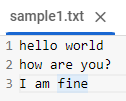

In [44]:
# write lines
L = ['hello\n','hi\n','how are you\n','I am fine']

f = open('/content/sample.txt','w')
f.writelines(L)  # writing multiple lines
f.close()

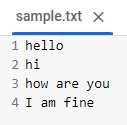

### Advantage of closing file everytime.

1) Using file.close() we remove file from the buffer memory so that it will takr unrecessarry step.

2) If file is in ram then one can access it or hack it and he will change the file.

In [45]:
# reading from files
# -> using read()
f = open('/content/sample.txt','r')
s = f.read()
print(s)
f.close()

hello
hi
how are you
I am fine


## Text files only understands texual(string) data, they dont understand any other data type.

Read function will return a string. We will either print it or save it in a variable.

In [46]:
# reading upto n chars
f = open('/content/sample.txt','r')
s = f.read(10)
print(s)
f.close()

hello
hi
h


In [47]:
# readline() -> to read line by line
f = open('/content/sample.txt','r')
print(f.readline()) # here we see 2 line gap between the 2 sentence.
print(f.readline()) # because one /n will apply by readline() and another /n will apply by print()
f.close()

hello

hi



In [48]:
# readline() -> to read line by line
f = open('/content/sample.txt','r')
print(f.readline(),end='')
print(f.readline(),end='')
f.close()

hello
hi


### we generally use readline when we have very large dataset. So that we dont have to upload all data in memory at once.

### when we have small dataset then we will use read funtion

In [49]:
# reading entire using readline
f = open('/content/sample.txt','r')

while True:

  data = f.readline()

  if data == '':
    break
  else:
    print(data,end='')

f.close()

hello
hi
how are you
I am fine

### Using Context Manager (With)

- It's a good idea to close a file after usage as it will free up the resources
- If we dont close it, garbage collector would close it
- with keyword closes the file as soon as the usage is over
- with is replacement of file.close()

In [50]:
# with
with open('/content/sample1.txt','w') as f:
  f.write('Deepa Gupta')  # it will close the file automatically

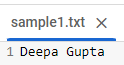

In [51]:
f.write('hello')

ValueError: I/O operation on closed file.

In [52]:
# try f.read() now
with open('/content/sample.txt','r') as f:
  print(f.readline())

hello



In [53]:
# moving within a file -> 10 char then 10 char
with open('sample.txt','r') as f:
  print(f.read(10))
  print(f.read(10)) # next 10 characters
  print(f.read(10)) # next 10 characters
  print(f.read(10)) # next 10 characters

hello
hi
h
ow are you

I am fine



In [54]:
# benefit? -> to load a big file in memory
big_L = ['hello world ' for i in range(1000)]

with open('big.txt','w') as f:
  f.writelines(big_L)


In [55]:
# incorrect code
with open('big.txt','r') as f:

  chunk_size = 10

  while len(f.read(chunk_size)) > 0:
    print(f.read(chunk_size),end='***') # print the current chunk size chars
    f.read(chunk_size) # load the next chunk size chars otherwise it will infinitely print the current chunk only

d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo**

In [56]:
# correct code
with open('big.txt','r') as f:

  chunk_size = 10
  data=f.read(chunk_size)
  while len(data)>0:
    print(f.read(chunk_size),end='***')
    data=f.read(chunk_size)


d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell***llo world ***d hello wo***world hell**

### Tell function will return the index which is going to print next and also how much data is printed till now.

In [57]:
# seek and tell function
with open('sample.txt','r') as f:
  print(f.read(10))
  print(f.tell())
  f.seek(0) # put the cursor at first character
  print(f.read(10))
  print(f.tell()) # we are at index 10 again

hello
hi
h
10
hello
hi
h
10


In [58]:
# seek and tell function
with open('sample.txt','r') as f:
  f.seek(15) # start from 15 index
  print(f.read(10))
  print(f.tell()) # It tells what we are doing to print next. It will return the index we are at

  print(f.read(10))
  print(f.tell()) # file contain only 30 characters

e you
I am
25
 fine
30


In [59]:
# seek during write
with open('sample.txt','w') as f:
  f.write('Hello')
  f.seek(0)
  f.write('Xa')

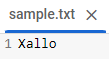

### Problems with working in text mode

- can't work with binary files like images
- not good for other data types like int/float/list/tuples

## working with binary file

In [23]:
with open('Screenshot-1.png','r') as f:
  f.read()  # here read function search for unicode characters and we are sending a binary data(image) as byte

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [60]:
# working with binary file
with open('Screenshot-1.png','rb') as f:  # read-binary mode
  with open('screenshot_copy.png','wb') as wf: # write-binary
    wf.write(f.read())

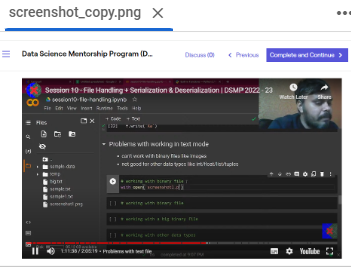

In [ ]:
# working with a big binary file

## working with other data types

In [61]:
with open('sample.txt','w') as f:
  f.write(5)

TypeError: write() argument must be str, not int

In [62]:
with open('sample.txt','w') as f:
  f.write('5')

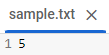

In [27]:
with open('sample.txt','r') as f:
  print(f.read() + 5)

TypeError: can only concatenate str (not "int") to str

In [28]:
with open('sample.txt','r') as f:
  print(int(f.read()) + 5)

10


In [63]:
# more complex data
d = {
    'name':'nitish',
     'age':33,
     'gender':'male'
}

with open('sample.txt','w') as f:
  f.write(str(d))

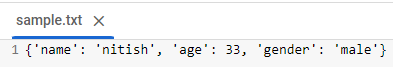

In [64]:
with open('sample.txt','r') as f:
  print(f.read())
  print(type(f.read()))

{'name': 'nitish', 'age': 33, 'gender': 'male'}
<class 'str'>


In [ ]:
with open('sample.txt','r') as f:
  print(dict(f.read()))

ValueError: ignored

## if make a dictionary in a file we cannot get a dictionary ever it will convert into string . To solve this issue serialization and deserialization is used.

### Serialization and Deserialization

- **Serialization** - process of converting python data types to JSON format
- **Deserialization** - process of converting JSON to python data types

#### What is JSON? (JavaScript On Notation)

It is a universal data format that is understood by every programming language.

Nowadays, every api is using json format.


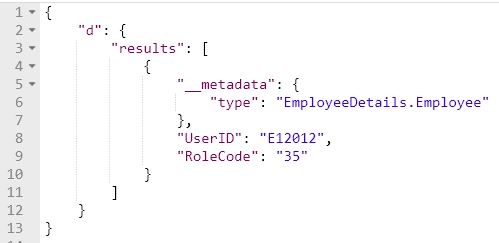

In [65]:
# serialization using json module
# list
import json

L = [1,2,3,4]

with open('demo.json','w') as f:
  json.dump(L,f) # dump fucntion needs 2 things "what are going to dump and a file handler"


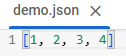

In [66]:
# dict
d = {
    'name':'nitish',
     'age':33,
     'gender':'male'
}

with open('demo.json','w') as f:
  json.dump(d,f,indent=4) # using indent to show correctly

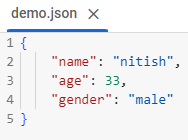

In [67]:
# deserialization
import json

with open('demo.json','r') as f:
  d = json.load(f) # load function takes object handler
  print(d)
  print(type(d))

{'name': 'nitish', 'age': 33, 'gender': 'male'}
<class 'dict'>


In [68]:
# serialize and deserialize tuple
import json

t = (1,2,3,4,5)

with open('demo.json','w') as f:
  json.dump(t,f)

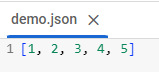

## One problem with serializing and deserializing a tuple is it will store the tuple as a list inside the file and on deserializing it will print list instead of tuple.

Later we can convert it into a tuple using type conversion.

In [69]:
# serialize and deserialize a nested dict

d = {
    'student':'nitish',
     'marks':[23,14,34,45,56]
}

with open('demo.json','w') as f:
  json.dump(d,f)

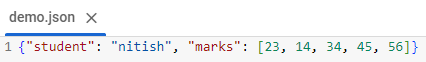

### Serializing and Deserializing custom objects

In [36]:
class Person:

  def __init__(self,fname,lname,age,gender):
    self.fname = fname
    self.lname = lname
    self.age = age
    self.gender = gender

# format to printed in
# -> Nitish Singh age -> 33 gender -> male

In [37]:
person = Person('Nitish','Singh',33,'male')

In [38]:
# We cannot serializa a object like this
with open('demo.json','w') as f:
  json.dump(person,f)

TypeError: Object of type Person is not JSON serializable

In [72]:
# As a string
import json

def show_object(person):
  if isinstance(person,Person):
    return "{} {} age -> {} gender -> {}".format(person.fname,person.lname,person.age,person.gender)

with open('demo.json','w') as f:
  json.dump(person,f,default=show_object)

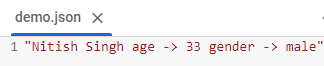

In [73]:
# As a dict
import json

def show_object(person):
  if isinstance(person,Person):
    return {'name':person.fname + ' ' + person.lname,'age':person.age,'gender':person.gender}

with open('demo.json','w') as f:
  json.dump(person,f,default=show_object,indent=4)

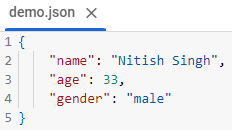

In [ ]:
# deserializing
import json

with open('demo.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d))

{'name': 'Nitish Singh', 'age': 33, 'gender': 'male'}
<class 'dict'>


## Here we are printing our custom object as a dictionary or string. But we want to serialize our object and deserialize it to get to object itself.

Idea: We will create a class and then its object.

Then we will use this object in some other file, same as it will work in its file.

Implementation: We will do this work by using binary not by using text.

We will convert object into binary format and then it become transferable.

Now the object will do all works as it is in some other file which it can do in original file.

### Pickling
`Pickling` is the process whereby a Python object hierarchy is converted into a byte stream, and `unpickling` is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

In [74]:
class Person:

  def __init__(self,name,age):
    self.name = name
    self.age = age

  def display_info(self):
    print('Hi my name is',self.name,'and I am ',self.age,'years old')

In [75]:
p = Person('nitish',33)

In [76]:
# pickle dump
import pickle
with open('person.pkl','wb') as f: # open in write binary mode while pickling
  pickle.dump(p,f)

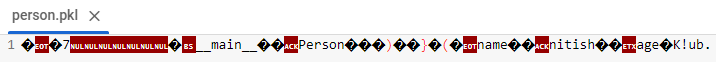

In [77]:
# pickle load
import pickle
with open('person.pkl','rb') as f:
  p = pickle.load(f)

p.display_info()

Hi my name is nitish and I am  33 years old


### Pickle Vs Json

- Pickle lets the user to store data in binary format. JSON lets the user store data in a human-readable text format.